<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization - Line Charts**


### Student Author: Abigail Hedden

## Objectives


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Set-up

In [5]:
# import required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# set seaborn style
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

In [1]:
# download dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-21 19:51:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  8.24MB/s    in 18s     

2025-07-21 19:51:57 (8.68 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [3]:
df = pd.read_csv("survey-data.csv")


In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


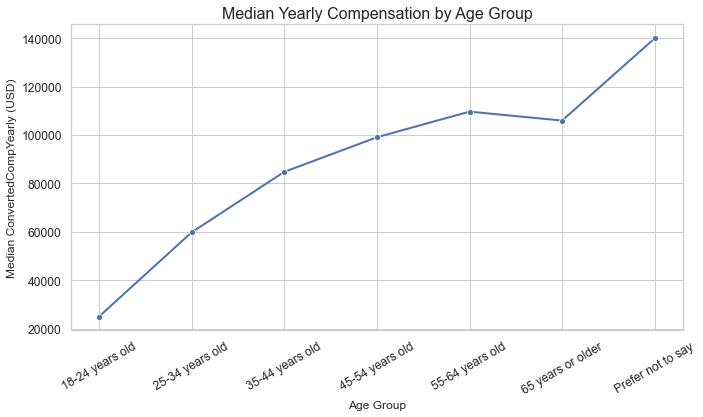

In [14]:
# order ages for plotting
age_order = [
    '18-24 years old', 
    '25-34 years old', 
    '35-44 years old',
    '45-54 years old',
    '55-64 years old', 
    '65 years or older', 
    'Prefer not to say'
]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# calculate median comp by age
median_comp_by_age = (df.groupby('Age')['ConvertedCompYearly'].median().reset_index())

# plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=median_comp_by_age, x='Age', y='ConvertedCompYearly', marker='o',linewidth=2)
plt.title('Median Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median ConvertedCompYearly (USD)', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [18]:
df.YearsCodePro

0        NaN
1         17
2         27
3        NaN
4        NaN
        ... 
65432      3
65433    NaN
65434      5
65435      2
65436    NaN
Name: YearsCodePro, Length: 65437, dtype: object

0        NaN
1         17
2         27
3        NaN
4        NaN
        ... 
65432      3
65433    NaN
65434      5
65435      2
65436    NaN
Name: YearsCodePro, Length: 65437, dtype: object

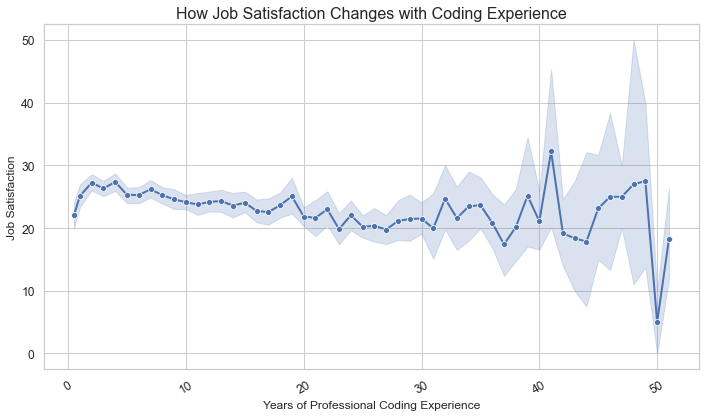

In [26]:
df['YearsCodePro'] = (df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}).astype(float))

# using YearsCodePro
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearsCodePro', y='JobSatPoints_6', marker='o',linewidth=2)
plt.title('How Job Satisfaction Changes with Coding Experience', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [27]:
df.WorkExp

0         NaN
1        17.0
2         NaN
3         NaN
4         NaN
         ... 
65432     NaN
65433     NaN
65434     NaN
65435     5.0
65436     NaN
Name: WorkExp, Length: 65437, dtype: float64

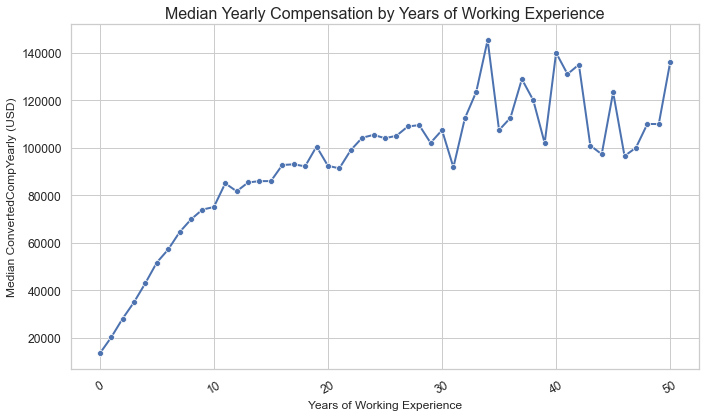

In [30]:
# calculate median comp by age
median_comp_by_exp = (df.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index())

# plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=median_comp_by_exp, x='WorkExp', y='ConvertedCompYearly', marker='o',linewidth=2)
plt.title('Median Yearly Compensation by Years of Working Experience', fontsize=16)
plt.xlabel('Years of Working Experience', fontsize=12)
plt.ylabel('Median ConvertedCompYearly (USD)', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
